In [1]:
import torch
from model import Generator
from checkpoint import load_checkpoint
from utils import get_config, resolve_path
import matplotlib.pyplot as plt
import numpy as np


Using device: cuda
Loading checkpoint '/arc/home/Amirabezine/deepSpectra/checkpoints//checkpoint_best.pth.tar'
Best model loaded successfully.


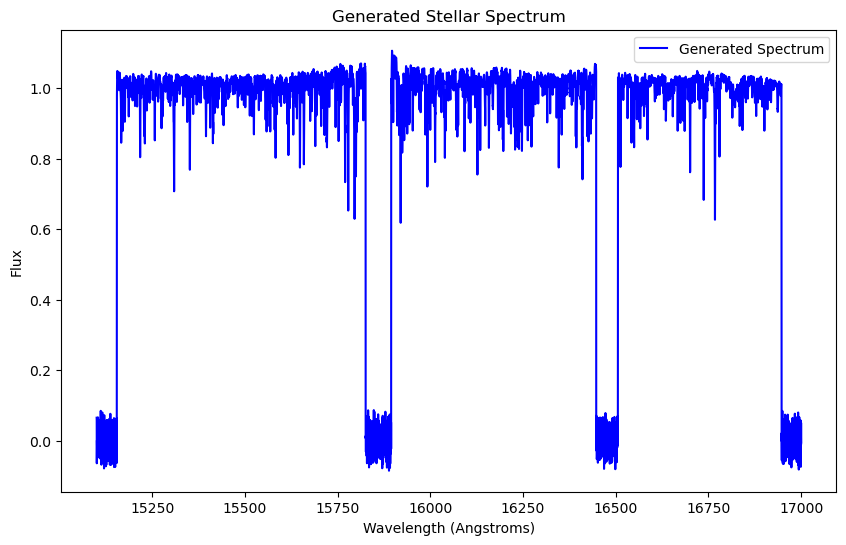

In [2]:

def generate_spectrum():
    config = get_config()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Initialize generator
    latent_dim = config['training']['latent_dim']
    output_dim = config['model']['output_dim']  # Ensure this is correctly set in your config
    generator_layers = config['model']['generator_layers']
    activation_function = getattr(torch.nn, config['model']['activation_function'])
    generator = Generator(latent_dim, output_dim, generator_layers, activation_function).to(device)

    # Load best model checkpoint
    best_checkpoint_path = resolve_path(config['paths']['checkpoints']) + '/checkpoint_best.pth.tar'
    best_checkpoint = load_checkpoint(best_checkpoint_path)
    if best_checkpoint:
        generator.load_state_dict(best_checkpoint['state_dict'])
        print("Best model loaded successfully.")
    else:
        print("Error loading the best model.")
        return

    generator.eval()

    # Generate a random latent code
    latent_code = torch.randn(1, latent_dim, device=device)

    # Generate spectrum
    with torch.no_grad():
        generated_flux = generator(latent_code).squeeze().cpu().numpy()

    # Assuming you have wavelength data
    wavelength = np.linspace(start=15100, stop=17000, num=output_dim)  # Example range, adjust as needed

    # Plot the generated spectrum
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength, generated_flux, label='Generated Spectrum', color='blue')
    plt.xlabel('Wavelength (Angstroms)')
    plt.ylabel('Flux')
    plt.title('Generated Stellar Spectrum')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    generate_spectrum()

In [3]:
# def plot_spectrum(wavelength, generated_flux, original_flux=None):
#     import matplotlib.pyplot as plt
#     import numpy as np

#     # Ensure wavelength and generated_flux are numpy arrays
#     wavelength = np.array(wavelength).flatten()
#     generated_flux = np.array(generated_flux).flatten()
    
#     # Print the shapes for debugging
#     print("wavelength shape:", wavelength.shape)
#     print("generated_flux shape:", generated_flux.shape)
#     if original_flux is not None:
#         original_flux = np.array(original_flux).flatten()
#         print("original_flux shape:", original_flux.shape)
    
#     # Sanity check on the sizes
#     if wavelength.shape[0] != generated_flux.shape[0]:
#         print("Mismatch in wavelength and generated_flux array sizes.")
#         return

#     if original_flux is not None and original_flux.shape[0] != wavelength.shape[0]:
#         print("Mismatch in wavelength and original_flux array sizes.")
#         return

#     plt.figure(figsize=(10, 6))
#     plt.plot(wavelength, generated_flux, label='Generated Flux', color='blue')
#     if original_flux is not None:
#         plt.plot(wavelength, original_flux, label='Original Flux', color='red', alpha=0.5)
#     plt.xlabel('Wavelength')
#     plt.ylabel('Flux')
#     plt.title('Flux vs. Wavelength')
#     plt.legend()
#     plt.show()


In [4]:
# if __name__ == "__main__":
#     config = get_config()
    
#     hdf5_path = resolve_path(config['paths']['hdf5_data'])
#     dataset = APOGEEDataset("../data/hdf5/spectra.hdf5", max_files=1)  # Load a single file to get the output_dim
#     dataloader = DataLoader(dataset, batch_size=1, shuffle=True)
    
#     sample = next(iter(dataloader))
#     flux_example = sample['flux']
#     print(flux_example.shape)
#     wavelength_example = sample['wavelength']
#     print(wavelength_example.shape)
#     output_dim = flux_example.size(0)  # Determine the output_dim based on the sample
    
#     best_model_path = resolve_path(config['paths']['checkpoints']) + '/checkpoint_best.pth.tar'
#     generator = load_model(config, best_model_path, output_dim)
    
#     generated_spectrum = generate_spectrum(generator, config['training']['latent_dim'])
#     print(generated_spectrum.shape)
#     # plot_spectrum(wavelength_example.numpy(), generated_spectrum, original_flux=flux_example.numpy())
